In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

GR-KURUMI analogread analysis


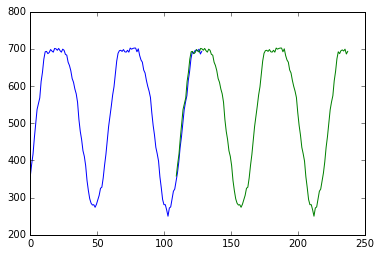

In [57]:
data=np.loadtxt('kurumi1.dat', delimiter=',')
ts = np.linspace(0,128,128);
plt.plot(ts,data[0:128], ts+109,data[0:128])

In [21]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

nsdf[0]= 1.0 ,nsdf[53]= 0.713544692178 nsdf[54]= 0.716416357499 nsdf[55]= 0.707165069425
[ 1.          0.98516556  0.95496803  0.9093344   0.85085416  0.78165414
  0.70250182  0.61370284  0.51686473  0.41656613  0.31426242  0.2121249
  0.11055067  0.00909464 -0.09092075 -0.18775549 -0.27924763 -0.36533533
 -0.44472503 -0.51558623 -0.57839329 -0.6325707  -0.67727018 -0.71209382
 -0.73702627 -0.75242517 -0.75734624 -0.75354559 -0.73988564 -0.71646118
 -0.68427282 -0.64510209 -0.59958006 -0.54743189 -0.48777798 -0.42119888
 -0.34952415 -0.2750904  -0.19905896 -0.1212647  -0.04230925  0.03785427
  0.11832428  0.19615079  0.2724336   0.34577251  0.41567795  0.4810653
  0.54009277  0.59265483  0.63686317  0.67238821  0.697971    0.71354469
  0.71641636  0.70716507  0.68563925  0.65305763  0.61134267  0.56161899
  0.50458842  0.44097682  0.37280764  0.30077638  0.22864259  0.15844996
  0.08977931  0.02195203 -0.04385562 -0.10764963 -0.16758209 -0.22332453
 -0.27368042 -0.31791257 -0.35595399 

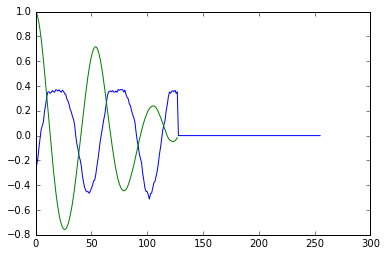

In [59]:
N=256
N2=int(N/2)

x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
plt.plot(x)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
Finv=np.fft.ifft(ps)
r=np.real(Finv)
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)
print("nsdf[0]=", nsdf[0], ",nsdf[53]=", nsdf[53], "nsdf[54]=", nsdf[54], "nsdf[55]=", nsdf[55])
print(nsdf)

-- fft --
[ 0.02687836+0.j          0.01408206-0.01083199j  0.01019394-0.01289334j
  0.02106862+0.00157597j  0.03322727-0.07356833j -0.09218226-0.03948883j
 -0.01175481+0.05024298j -0.00840395-0.0100547j   0.00126901+0.02571354j
  0.00600807-0.02273884j]
-- ps --
[ 0.0924731   0.04040147  0.03457977  0.05713541  0.83409286  1.28728797
  0.34080412  0.0219806   0.08483795  0.07080342]
-- ifft --
[-0.01409197 -2.88804354e-17j -0.01324529 -3.25766754e-17j
 -0.01228458 -1.30104261e-18j -0.01119655 -4.13775667e-18j
 -0.00996482 -7.34093575e-18j -0.00859763 -9.58865657e-18j
 -0.00713207 +4.36019563e-19j -0.00561324 -1.37327536e-18j
 -0.00406095 -1.86431812e-18j -0.00247248 -4.19816465e-19j]
-- ms --
[ 0.04649307  0.04631637  0.04620548  0.04613823  0.04611886  0.0461176
  0.04611294  0.04610042  0.04607705  0.04600254]
max r= 0.0232465341687 , max m= 0.0464930683374
-- nsdf --
[ 1.          0.98516556  0.95496803  0.9093344   0.85085416  0.78165414
  0.70250182  0.61370284  0.51686473  0.416

C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


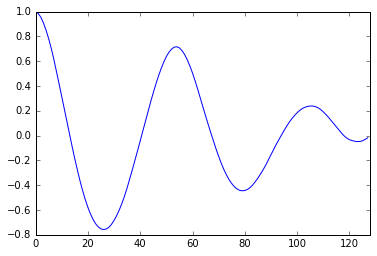

In [23]:

# overflow considering
F=np.fft.fft(x)/N             #scale to avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F))*N/2  #multiply N to get better resolution
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)           #no scaling
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/(N*2)                       #avoid overflow
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print("-- ms --")
print(m[0:10])
#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*r/(m)                #avoid overflow here
print("-- nsdf --")
print(nsdf[0:10])
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [ ]:
#512*1024adc and min, max w/o advertising
ts=np.array([38902980, 38901476, 38900266, 38900491, 38900613,38900814 ])
ts=ts*2/1000/1000

In [61]:
print(ts)
tavg=np.average(ts)
T=tavg

print("1024*1024 sampling took T=",T, "sec")
freq=1/(T)*1024*1024
print("freq per sample=", round(freq), "T per sample=", T/(1024*1024))
print("freq per 1024samples=", round(freq*1024))
ns=np.arange(128)
freqs=1/(ns*T/1024/1024)
#print("freqs=\n", freqs)
k=np.log10(2**(1/12))
midinotes=np.round(np.log10(freqs/27.5)/k)+21
# array to use in program
print(midinotes)

[   0.            1.00787402    2.01574803    3.02362205    4.03149606
    5.03937008    6.04724409    7.05511811    8.06299213    9.07086614
   10.07874016   11.08661417   12.09448819   13.1023622    14.11023622
   15.11811024   16.12598425   17.13385827   18.14173228   19.1496063
   20.15748031   21.16535433   22.17322835   23.18110236   24.18897638
   25.19685039   26.20472441   27.21259843   28.22047244   29.22834646
   30.23622047   31.24409449   32.2519685    33.25984252   34.26771654
   35.27559055   36.28346457   37.29133858   38.2992126    39.30708661
   40.31496063   41.32283465   42.33070866   43.33858268   44.34645669
   45.35433071   46.36220472   47.37007874   48.37795276   49.38582677
   50.39370079   51.4015748    52.40944882   53.41732283   54.42519685
   55.43307087   56.44094488   57.4488189    58.45669291   59.46456693
   60.47244094   61.48031496   62.48818898   63.49606299   64.50393701
   65.51181102   66.51968504   67.52755906   68.53543307   69.54330709
   70.5

In [65]:
k=np.log10(2**(1/12))
np.round(np.log10(258.3026/27.5)/k)+21

60.0

In [64]:
print(midinotes[53])

63.0


In [24]:
ns

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])